- 이한솔 / LEE HANSOL
- insurance data 분석

# 목차

    0. 개요
    1. Library & Data Import
        1-1. 데이터 살펴보기
    2. 데이터 분석 (EDA: 탐색적 데이터 분석)
        2-1. 데이터셋 기본 정보 파악하기
        2-2. check unique value - 오류값 확인
        2-3. 종속변수 탐색
        2-4. 독립변수 탐색
        2-5. 정규화
        2-6. 범주형 독립변수별 종속변수 살펴보기
        2-7. 나머지 독립변수 boxplot
        2-8. 상관관계 분석
        2-9. 더미변수화
    3. 선형회귀분석
        3-1. Create the train and test datasets
        3-2. 다중공선성(VIF)
        3-3. 선형회귀분석 모델 학습(회귀모델링)
        3-4. 모델 해석하기
        3-5. 유의성 검정
        3-6. 분석 결론
        3-7. 예측 결과
        3-8. 모델 성능 평가
    4. 결론

# 0. 개요

데이터셋 : insurance.csv

 : insurance 데이터(보험 가입자 정보)를 활용해 의료비 변수(charges)를 분석해보았고, 
 
이에 기초하여 의료비(charges)와 독립변수들의 관계를 파악한다.

선형회귀분석을 통해 독립변수들의 회귀계수 파악하여 의료비(charges)에 영향을 미치는 영향 요소(독립변수) 파악

# 1. Library & Data Import

In [ ]:
# import library
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# data upload
from google.colab import files
myfile = files.upload()

Saving insurance.csv to insurance (1).csv


In [ ]:
# data 불러오기
import io
df=pd.read_csv(io.BytesIO(myfile['insurance.csv']))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 1-1 데이터 살펴보기 :Features Descriptions
 
각 변수의 의미는 다음과 같습니다:

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance

    연령: 1차 수혜자의 연령

    성별: 보험 계약자 성별, 여성, 남성

    bmi: 신체에 대한 이해를 제공하는 체질량지수, 키에 비해 상대적으로 높거나 낮은 체중,
    체중 대비 키 비율을 사용한 체중(kg/m^2)의 객관적 지수, 바람직하게는 18.5 ~ 24.9

    자녀 : 건강보험이 적용되는 자녀수 / 부양가족수

    흡연자: 흡연

    지역: 수혜자의 주거 지역, 북동부, 남동부, 남서부, 북서부.

    요금: 건강보험에서 청구되는 개별 의료비

# 2. 데이터 분석 (EDA: 탐색적 데이터 분석)
데이터의 각 변수(features, attributes, columns, x들)의 기본 정보 및 각 변수의 특성


## 2-1 데이터 셋의 기본 정보 파악하기

In [ ]:
# 데이터 셋 구조 보기
df.shape
## (행 1338개, 열 7개)

(1338, 7)

In [ ]:
# 데이터 상위 5개행 확인
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# data type check
df.info()
## data type이 이상한 변수는 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# missing value 확인
df.isnull().sum()
## 결측값 없음.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# 숫자형 변수만 뽑아서 기본 통계 나타내기.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 2-2 check unique value - 오류값 확인

In [ ]:
df.age.unique()
## 오류값 없음

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
df.sex.unique()
## 오류값 없음

array(['female', 'male'], dtype=object)

In [ ]:
df.children.unique()
## 오류값 없음

array([0, 1, 3, 2, 5, 4])

In [ ]:
df.smoker.unique()
## 오류값 없음

array(['yes', 'no'], dtype=object)

In [ ]:
df.region.unique()
## 오류값 없음

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.charges.unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
df.bmi.unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

## 2-3 종속변수(y)의 탐색 : charges

    - charges : 의료비를 종속변수로 설정하였습니다. 보험 가입자 정보를 바탕으로 의료비(보험료)를 분석할 것이기 때문입니다.

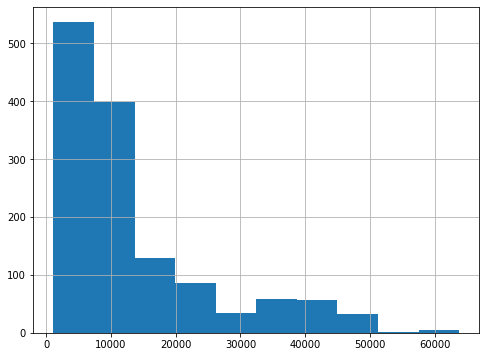

In [ ]:
# charges : 실수 -> 히스토그램으로 시각화
fig = plt.figure(figsize = (8, 6))
ax = fig.gca()  # Axes 생성

df['charges'].hist(ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


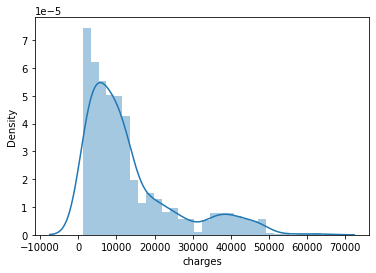

In [ ]:
# 분포 확인
sns.distplot(df['charges'])
## 정규분포가 아니고 비대칭성 존재
## positive skewness

* skewness : 비대칭성(왜도)
  - positive skewness : 데이터의 중심(평균)이 정규분포보다 왼쪽으로 치우쳐져 있다.(꼬리는 오른쪽으로 뻗어있음) -> left skewness
  - -2 ~ +2 : 왜도가 크지 않음
  - positive skewness, negative skewness
  
* kurtosis
  - 뾰족한 형태
  - 평균을 중심으로 각 샘플이 몰려있을수록 더 뾰족
    - 첨도가 커짐
  - 정규분포의 경우, kurtosis=0
    - 첨도>0 : 정규분포보다 더 뾰족
    - 첨도<0 : 높이가 정규분포보다 낮아짐

In [ ]:
# 왜도 구하기
df['charges'].skew()
## 왼쪽으로 치우처져 있음

1.5158796580240388

In [ ]:
# kurtosis 구하기
df['charges'].kurt()
## 뾰족한 형태

1.6062986532967907

In [ ]:
# charges의 기초 통계량을 다시 살펴본다.

df['charges'].describe()
# 의료비의 평균은 약 13270.42
# 의료비는 1121.87(최소값) ~ 63770.43(최대값) 사이에 분포하고 있다. 

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

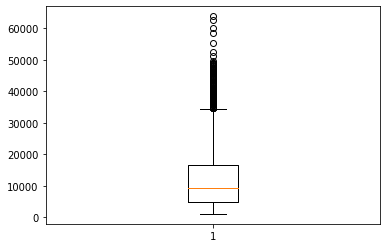

In [ ]:
# 상자그림을 통해 데이터의 분포 및 이상치 파악
plt.boxplot(df['charges']) 
plt.show()
# 주로 4740.28에서 16639.91 사이에 분포해있고 이상치가 존재한다.

In [ ]:
# charges의 사분위수 확인
Q0_df = np.percentile(df['charges'], 0) # 최소값, 0사분위수
Q1_df = np.percentile(df['charges'], 25) # 1사분위수
Q2_df = np.percentile(df['charges'], 50) # 중앙값, 2사분위수
Q3_df = np.percentile(df['charges'], 75) # 3사분위수
Q4_df = np.percentile(df['charges'], 100) # 최대값, 4사분위수

print(f'최소값:{Q0_df}, 1사분위수:{Q1_df}, 중앙값:{Q2_df}, 3사분위수:{Q3_df}, 최대값:{Q4_df}')

최소값:1121.8739, 1사분위수:4740.28715, 중앙값:9382.033, 3사분위수:16639.912515, 최대값:63770.42801


In [ ]:
# 사분위수 범위(IQR) : 데이터의 중간 50%에 대한 범위
IQR_df=Q3_df - Q1_df
IQR_df 

11899.625365

In [ ]:
## 이상치 경계값
upper_df=Q3_df+1.5*IQR_df
lower_df=Q1_df-1.5*IQR_df

upper_df, lower_df
# 34489.35보다 크거나 -13109.15보다 작으면 이상치이다.

(34489.350562499996, -13109.1508975)

## 2-4 독립변수(features, x) 살펴보기
    - 각 설명변수의 특징 파악하기(시각화)
    - charges(의료비)를 제외한 나머지 열변수(보험 가입자 정보) 모두를 독립변수로 설정하였습니다. 
    - 보험 가입자 정보를 바탕으로 의료비(charges)를 분석할 것이기 때문입니다.

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# insurance_information_columns : 독립변수로 설정한 보험 가입자 정보 (종속변수 charges 제외)
# insurance_information_columns : 실수(float), 정수(int), 범주형(object) -> 분포 확인
insurance_information_columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region']

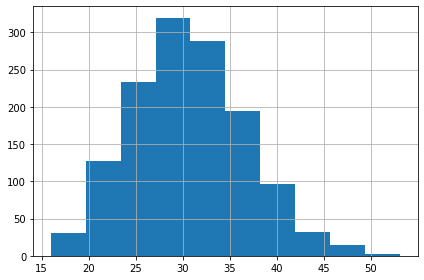

In [ ]:
# bmi : 실수(float) -> 히스토그램으로 분포 확인

### figsize() : plot()의 기본 크기 지정 
fig = plt.figure(figsize = (6,4))
ax = fig.gca()  # Axes 생성

df['bmi'].hist(ax=ax)
plt.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


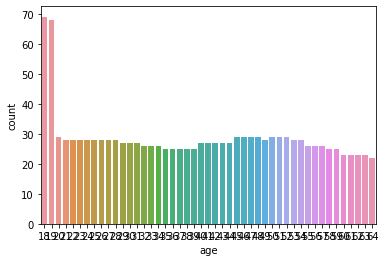

In [ ]:
### age, sex, children, smoker, region : 정수(int), 범주형(object) -> 막대그래프로 분포 확인

# age 막대그래프
sns.countplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


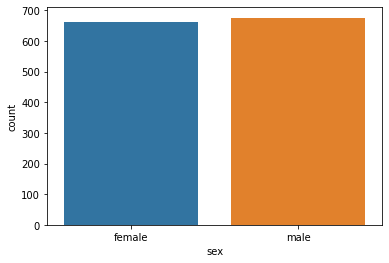

In [ ]:
# sex 막대그래프
sns.countplot(df['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


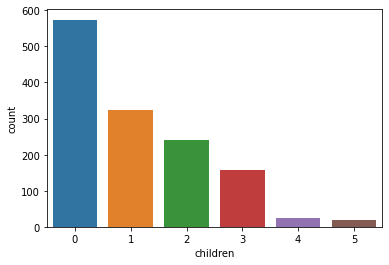

In [ ]:
# children 막대그래프
sns.countplot(df['children'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


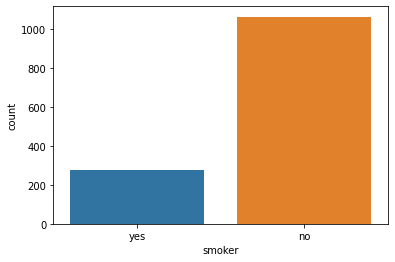

In [ ]:
# smoker 막대그래프
sns.countplot(df['smoker'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


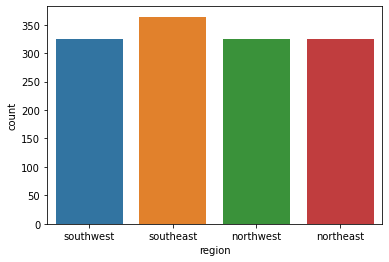

In [ ]:
# region 막대그래프
sns.countplot(df['region'])

## 2-5 정규화

In [ ]:
# 첫 5행 살펴보기
df.head()
## column별로 단위가 달라서 정규화할 필요가 있다.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Scaling
  - 머신러닝, 회귀분석 등 모델링을 수행하는 경우, scaling을 중요한 과정중 하나로 이행
  - 범위를 재정의

1. 스케일링을 수행하는 이유
  - 데이터의 모든 변수들은 각자 다른 단위를 가지고 있음(kg, billion $, gram)
  - 이러한 단위의 차이는 회귀모형, 머신러닝에서 문제를 발생시킬 수 있다.
  - 거리 기반의 모델링을 수행하는 경우, 상대적으로 범위가 넓은 변수가 거리 계산을 하는 과정에서 더 많은 기여를 하게 된다.
  - 더 중요한 변수 or 영향력이 높은 변수로 인식될 수 있음.

2. 스케일링 종류
  - Z-score 
    - 표준화
    - 데이터의 평균이 0, 분산이 1이 되도록 스케일링을 하는 것
    - min-max normalization
      - 0과 1 사이로 축소하는 것
      - 가장 작은 값을 0, 가장 큰 값을 1
      - Xi-min(x) / max(X)-min(X)

: 실제값과 추정값의 차이가 가장 작아지도록

In [ ]:
# 정규화 함수 생성(min-max)
def scale(a):
  b=(a-a.min())/(a.max()-a.min())
  return b

In [ ]:
# copy data 생성
df_scale=df.copy()

In [ ]:
# 정규화 할 수 있는 column 확인
df_scale.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# 정규화
df_scale['bmi']=scale(df_scale['bmi'])
df_scale['charges']=scale(df_scale['charges'])

In [ ]:
# 정규화된 데이터 확인
df_scale.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,0.321227,0,yes,southwest,0.251611
1,18,male,0.479150,1,no,southeast,0.009636
2,28,male,0.458434,3,no,southeast,0.053115
3,33,male,0.181464,0,no,northwest,0.333010
4,32,male,0.347592,0,no,northwest,0.043816


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


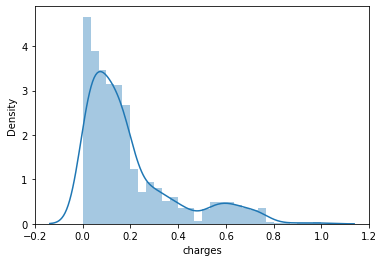

In [ ]:
# charges 스케일링 후 분포 재확인
sns.distplot(df_scale['charges'])

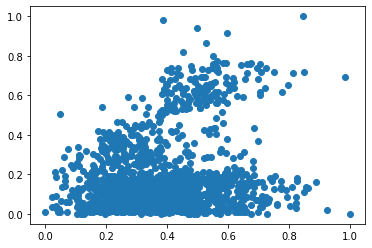

In [ ]:
# 산점도
plt.scatter(df_scale['bmi'], df_scale['charges'])

## 2-6 범주형 독립변수 별 종속변수 살펴보기
: 범주형 데이터끼리의 값을 비교하기 위해 boxplot 사용
: IQR = Q3(75%)-Q1(25%)


In [ ]:
df_scale.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

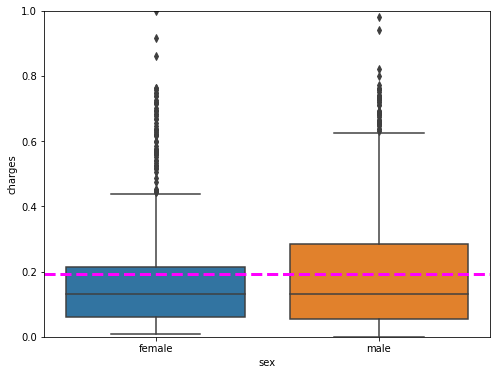

In [ ]:
# sex를 기준으로 한 boxplot
var='sex'
data_plt=pd.concat([df_scale['charges'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))

fig=sns.boxplot(x=var, y='charges', data=data_plt)
fig.axis(ymin=0, ymax=1) # min과 max를 미리 확인해서 설정함.

plt.axhline(df_scale.charges.mean(), color='magenta', linestyle='dashed', linewidth=3) # 전체 charges의 평균

## 의료비 평균 : 남성과 여성이 유사
## 여성 75% 이하의 의료비는 전체평균에 미치고, 남성 50% 이하의 의료비는 전체평균보다 낮다.

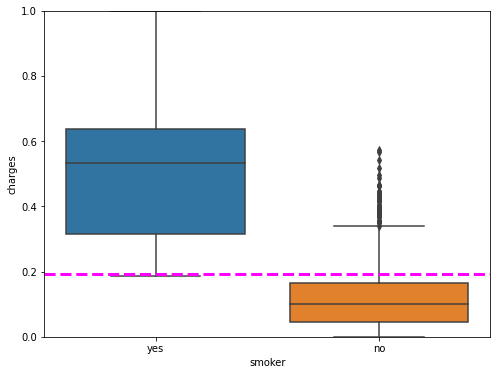

In [ ]:
# smoker를 기준으로 한 boxplot
var='smoker'
data_plt=pd.concat([df_scale['charges'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))

fig=sns.boxplot(x=var, y='charges', data=data_plt)
fig.axis(ymin=0, ymax=1) # min과 max를 미리 확인해서 설정함.

plt.axhline(df_scale.charges.mean(), color='magenta', linestyle='dashed', linewidth=3) # 전체 charges의 평균

## 의료비 평균 : 흡연자 > 비흡연자
## 비흡연자 75% 이하의 의료비는 전체평균에 미치고(전체평균보다 약간 낮고), 흡연자 약 100%의 의료비는 전체평균보다 높다.

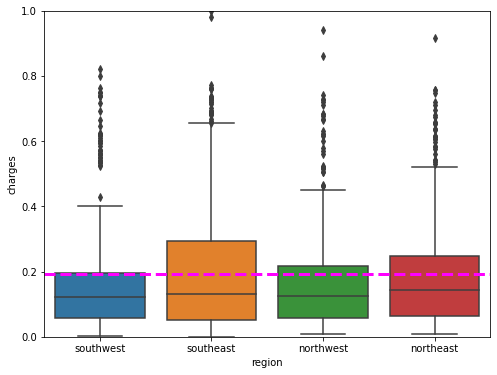

In [ ]:
# region를 기준으로 한 boxplot
var='region'
data_plt=pd.concat([df_scale['charges'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))

fig=sns.boxplot(x=var, y='charges', data=data_plt)
fig.axis(ymin=0, ymax=1) # min과 max를 미리 확인해서 설정함.

plt.axhline(df_scale.charges.mean(), color='magenta', linestyle='dashed', linewidth=3) # 전체 charges의 평균

## 의료비 평균 : 4개 지역이 유사
## southwest의 75% 이하는 전체평균에 미친다.

## 2-7 나머지 독립변수 boxplot

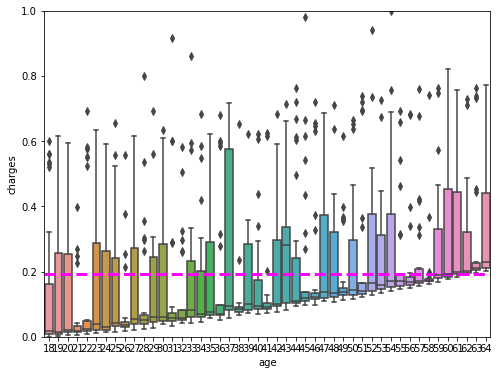

In [ ]:
# age를 기준으로 한 boxplot
var='age'
data_plt=pd.concat([df_scale['charges'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))

fig=sns.boxplot(x=var, y='charges', data=data_plt)
fig.axis(ymin=0, ymax=1) # min과 max를 미리 확인해서 설정함.

plt.axhline(df_scale.charges.mean(), color='magenta', linestyle='dashed', linewidth=3) # 전체 charges의 평균

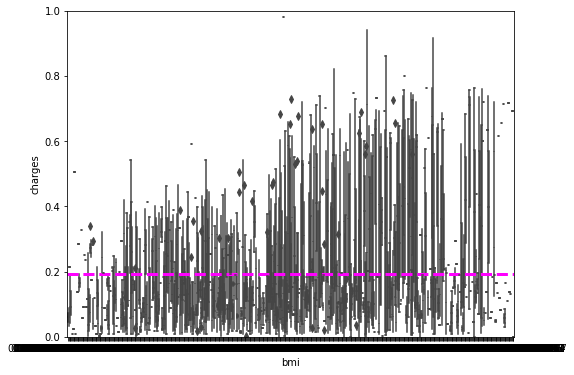

In [ ]:
# bmi를 기준으로 한 boxplot
var='bmi'
data_plt=pd.concat([df_scale['charges'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))

fig=sns.boxplot(x=var, y='charges', data=data_plt)
fig.axis(ymin=0, ymax=1) # min과 max를 미리 확인해서 설정함.

plt.axhline(df_scale.charges.mean(), color='magenta', linestyle='dashed', linewidth=3) # 전체 charges의 평균

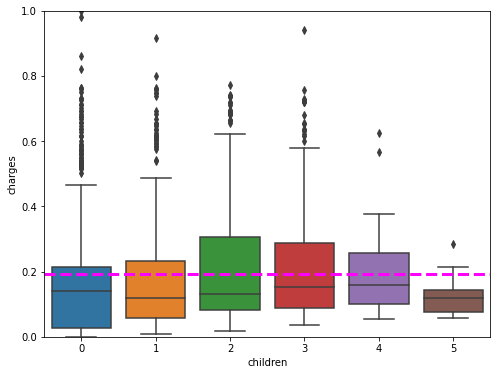

In [ ]:
# children를 기준으로 한 boxplot
var='children'
data_plt=pd.concat([df_scale['charges'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))

fig=sns.boxplot(x=var, y='charges', data=data_plt)
fig.axis(ymin=0, ymax=1) # min과 max를 미리 확인해서 설정함.

plt.axhline(df_scale.charges.mean(), color='magenta', linestyle='dashed', linewidth=3) # 전체 charges의 평균

## 2-8 상관관계(correlation) 분석

-1 < corr < 1
* correlation이 1에 가까울수록 -> a strong positive correlation (강한 양의 관계)
* correlation이 -1에 가까울수록 -> a strong negative correlation (강한 음의 관계)


$ \rho_{X, Y}=corr(X, Y) =\frac{cov(X, Y)}{\sigma_X \sigma_Y} $

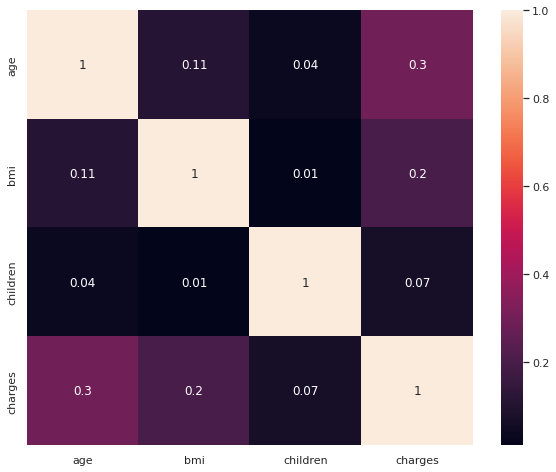

In [ ]:
# heatmap
sns.set(rc={'figure.figsize':(10,8)}) # 그래프 size 설정
correlation_matrix = df.corr().round(2) # 소수점 2자리
sns.heatmap(data=correlation_matrix, annot=True) # annot : correlation 수치 표시

## 변수간 상관관계 파악 가능 (인과관계X)

## charges와 다른 수치형 변수들은 모두 약한 양의 상관관계를 갖고 있음.
## age와 charges의 상관관계가 가장 높다(0.3)

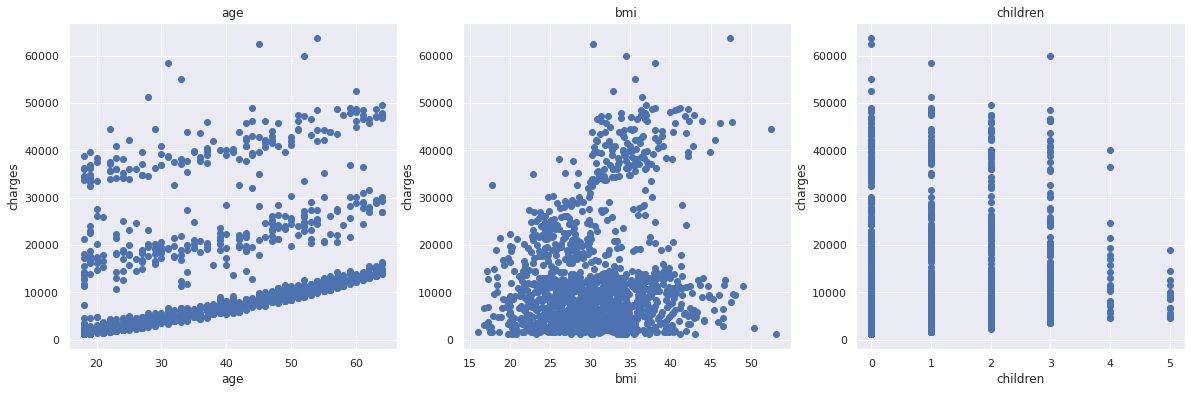

In [ ]:
# scatter plot(산점도) : 변수간 관계 파악
plt.figure(figsize=(20,6))
features=['age', 'bmi', 'children']

for i, col in enumerate(features):
  plt.subplot(1, len(features), i+1)

  x=df[col]
  y=df['charges']
  plt.scatter(x,y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('charges')

## age과 charges : weak positive
## bmi과 charges : weak positive
## children과 charges : none

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


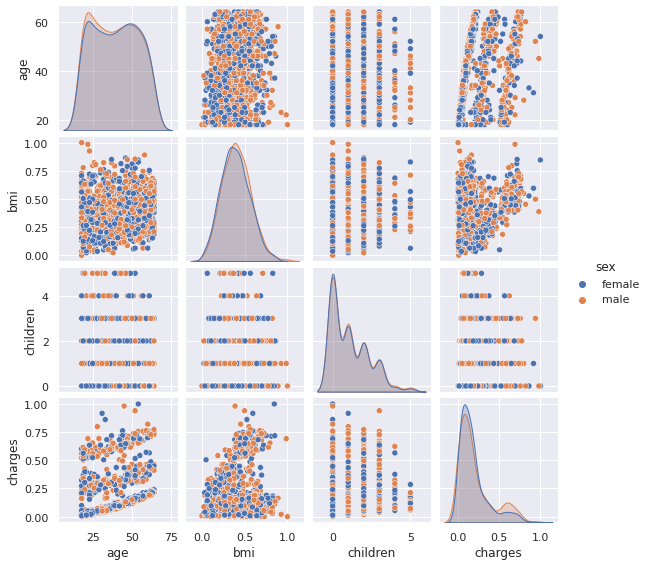

In [ ]:
sns.set()
sns.pairplot(df_scale, size=2.0, hue='sex')
plt.show()
## charges-age, charges-bmi는 선형관계가 있는 것으로 보인다.
## 그러나 이 관계에서 성별을 기준으로 구분했을 때, 성별 기준의 독립변수-종속변수 관계에서 유의미한 차이는 없는 것으로 보인다. (그래프에서 female과 male 데이터가 극명하게 나뉘지 않으므로)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


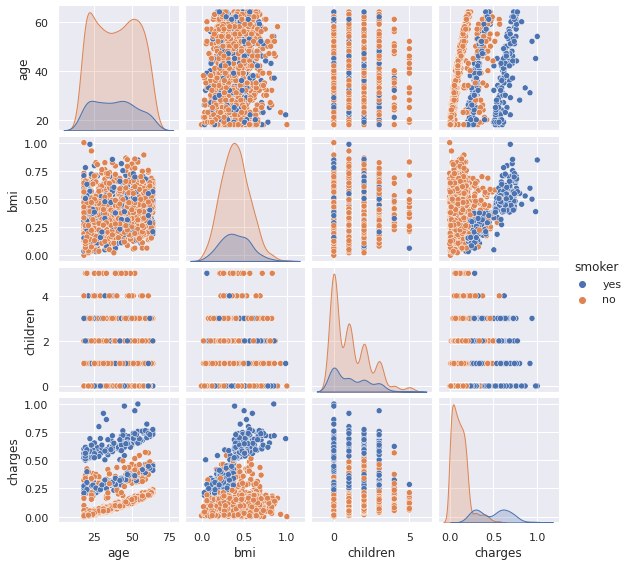

In [ ]:
sns.set()
sns.pairplot(df_scale, size=2.0, hue='smoker')
plt.show()
## charges-age, charges-bmi는 선형관계가 있는 것으로 보인다.
## 또한 이 관계에서 흡연자 여부를 기준으로 구분했을 때, 흡연자 여부 기준의 독립변수-종속변수 관계에서 유의미한 차이가 있는 것으로 보인다. (smoker의 yes. no 데이터가 극명하게 나뉘므로)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


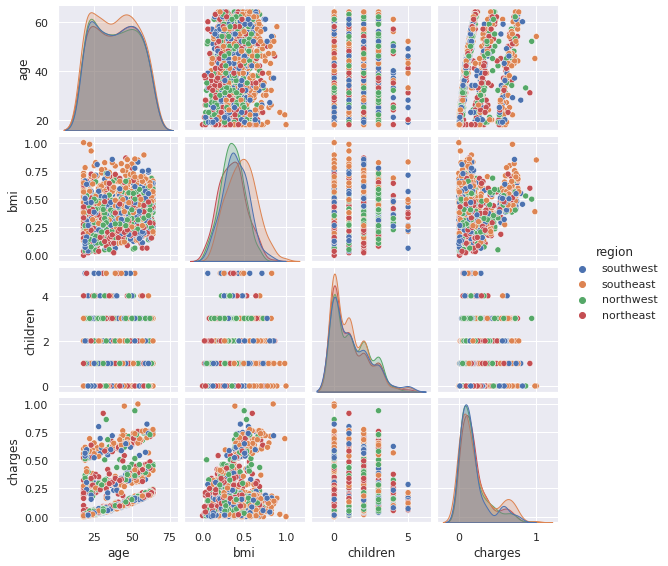

In [ ]:
sns.set()
sns.pairplot(df_scale, size=2.0, hue='region')
plt.show()
## charges-age, charges-bmi는 선형관계가 있는 것으로 보인다.
## 그러나 이 관계에서 region를 기준으로 구분했을 때, region 기준의 독립변수-종속변수 관계에서 유의미한 차이가 없는 것으로 보인다. (region의 southwest, southeast, northwest, northeast 데이터가 극명하게 나뉘지 않으므로)

## 2-9 더미변수화

In [ ]:
# sex, smoker, region열을 더미로 바꾸기
Y=df_scale['charges']
X=df_scale.drop(['charges'], axis=1) # 종속변수 drop
X=pd.get_dummies(X, columns=['sex', 'smoker', 'region']) # 더미 설정해서 데이터 간 우열이 없도록 범주화
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0.321227,0,1,0,0,1,0,0,0,1
1,18,0.479150,1,0,1,1,0,0,0,1,0
2,28,0.458434,3,0,1,1,0,0,0,1,0
3,33,0.181464,0,0,1,1,0,0,1,0,0
4,32,0.347592,0,0,1,1,0,0,1,0,0


# 3. 선형회귀분석(최종)

## 3-1 Create the train and test datasets
: overfitting 방지 목적

In [ ]:
# 학습데이터와 테스트데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, train_size=0.7,
                                                  random_state=529)  # 다음에 똑같은 데이터를 뽑을 수 있도록 고정

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smfz

In [ ]:
print(X_train.shape, X_test.shape)

(936, 11) (402, 11)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_selection= sm.add_constant(X_train.drop(['sex_female', 'smoker_no', 'region_northeast'], axis=1)) # drop한 더미변수(=> drop한 더미변수가 reference group이 되는 것.)

### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

# ex) japan을 drop(=> japan이 reference group이 되는 것)
## 미국 -0.1106 : japan보다 -0.1106만큼 연료의 효율성이 낮은것
## 유럽 -0.0409 : japan보다 -0.0409만큼 연료의 효율성이 낮은것

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
new_test=X_train[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']] 

In [ ]:
new_Xtrain=X_train[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']] 

In [ ]:
new_Xtest=X_test[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']] 

## 3-2 다중공선성(VIF)

In [ ]:
# VIF
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_selection.values, i) for i in range(X_selection.values.shape[1])]

In [ ]:
vif['features']=X_selection.columns

In [ ]:
# 변수간 영향이 높은 변수 파악하기
vif

## const : 상수

## vif 5이상 10이하는 의심 변수
## vif 10이상은 위험 변수

## 변수간 영향이 높은 변수는 없다.

,VIF Factor,features
0,17.672726,const
1,1.012179,age
2,1.085736,bmi
3,1.011131,children
4,1.008932,sex_male
5,1.017919,smoker_yes
6,1.478341,region_northwest
7,1.591885,region_southeast
8,1.484624,region_southwest


## 3-3 선형회귀분석 모델 학습(회귀모델링)

In [ ]:
# 학습
df_train = pd.concat([y_train, new_Xtrain], axis=1)
reg=smf.ols(formula='charges ~ new_Xtrain', data=df_train)
### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다. 

In [ ]:
result = reg.fit()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# 선형회귀모델링
lr=LinearRegression()
training_data=lr.fit(new_Xtrain, y_train)

In [ ]:
y_pred=lr.predict(new_Xtest)

## 3-4 모델 해석하기

In [ ]:
# 상수
lr.intercept_

-0.1257926918391863

In [ ]:
# 회귀계수
lr.coef_

array([ 0.00408212,  0.2094801 ,  0.01089507, -0.00135845,  0.38688805,
       -0.00745027, -0.01598225, -0.02032576])

In [ ]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)

coefs = pd.DataFrame(zip(new_Xtrain.columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,age,0.004082
1,bmi,0.209480
2,children,0.010895
3,sex_male,-0.001358
4,smoker_yes,0.386888
5,region_northwest,-0.007450
6,region_southeast,-0.015982
7,region_southwest,-0.020326


In [ ]:
### 크기 순서대로 나열합니다. 
### 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다. 
### 절대값 기준 함수: coefficients.abs().sort_values 

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
4,smoker_yes,0.386888
1,bmi,0.209480
7,region_southwest,-0.020326
6,region_southeast,-0.015982
2,children,0.010895
5,region_northwest,-0.007450
0,age,0.004082
3,sex_male,-0.001358


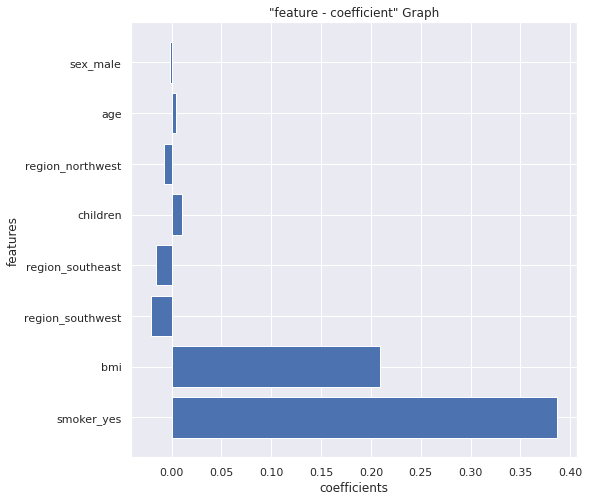

In [ ]:
### coefficients 를 시각화 합니다. 

### figure size
plt.figure(figsize = (8, 8))

### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그릴 수 있습니다. 
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

## 3-5 유의성 검정

In [ ]:
# 유의성 검정
print(result.summary())
## 3번(sex_male), 5번(region_northwest), 6번(region_southeast)은 p-value>0.05 이므로 통계적으로 유의하지 않은 변수이다.
## west랑 east만 다시 비교해보기

## 설명력은 76.2%

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     370.1
Date:                Sun, 05 Jun 2022   Prob (F-statistic):          1.96e-282
Time:                        15:34:56   Log-Likelihood:                 877.80
No. Observations:                 936   AIC:                            -1738.
Df Residuals:                     927   BIC:                            -1694.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1258      0.013     -9.618


### 참고) ###
- 결정 계수 (coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도이다.
- 종속 변수의 변동량 중에서 적용한 모형으로 설명 가능한 부분의 비율을 가리킨다. 
- 결정계수의 통상적인 기호는 R²이다. 
- 일반적으로 모형의 설명력으로 해석되지만 모형에 설명 변수가 들어갈수록 증가하기 때문에 해석에 주의해야 한다. 
- 결정계수의 값은 0에서 1 사이에 있으며, 종속 변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워진다. 
- 즉, 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 할 수 있다.

## 3-6 분석 결론

1. sex_male, region_northwest, region_southeast은 유의하지 않습니다. (p value > 0.05)

2. 의료비(charges)에 Positive한 영향을 미칩니다.
- age,
- bmi,
- children,
- smoker_yes는
: 다른 변수의 값이 고정됐을 때, 해당 변수의 값이 클수록 의료비가 높을 것입니다.

3. 의료비(charges)에 Negative한 영향을 미칩니다.
- region_southwest는
:다른 변수의 값이 고정됐을 때, 해당 변수의 값이 작을수록 의료비가 높을 것입니다.

## 3-7 예측 결과

In [ ]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,0.000249,0.034437
1,0.000398,0.072252
2,0.000439,0.082791
3,0.000664,0.139825
4,0.001911,-0.048275


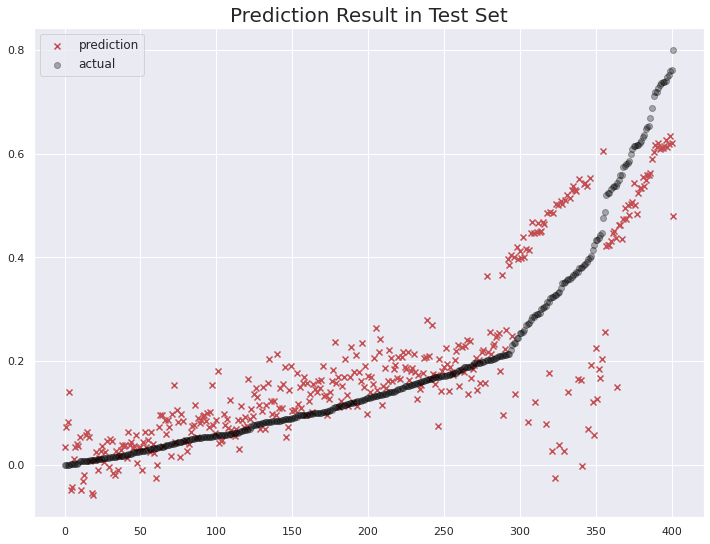

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

## 3-8 모델 성능 평가

In [ ]:
# RMSE
# test data 검증
mean_squared_error(y_pred, y_test)
## 0.0101 정도 다르다.

0.010183087076312217

In [ ]:
### 해설) Test set에서 해당 예측 모델의 R square가 0.762이고, RMSE가 0.0101입니다.

# 모델 수정

## region - east, west 로 구분



In [ ]:
# 데이터 복사
df_scale2 = df_scale.copy()

In [ ]:
# region 변수값 변경(east)
df_scale2.replace({'region':'southeast'}, 'east', inplace=True)
df_scale2.replace({'region':'northeast'}, 'east', inplace=True)
df_scale2

,age,sex,bmi,children,smoker,region,charges
0,19,female,0.321227,0,yes,southwest,0.251611
1,18,male,0.479150,1,no,east,0.009636
2,28,male,0.458434,3,no,east,0.053115
3,33,male,0.181464,0,no,northwest,0.333010
4,32,male,0.347592,0,no,northwest,0.043816
...,...,...,...,...,...,...,...
1333,50,male,0.403820,3,no,northwest,0.151299
1334,18,female,0.429379,0,no,east,0.017305
1335,18,female,0.562012,0,no,east,0.008108
1336,21,female,0.264730,0,no,southwest,0.014144


In [ ]:
# region 변수값 변경(west)
df_scale2.replace({'region':'southwest'}, 'west', inplace=True)
df_scale2.replace({'region':'northwest'}, 'west', inplace=True)
df_scale2

,age,sex,bmi,children,smoker,region,charges
0,19,female,0.321227,0,yes,west,0.251611
1,18,male,0.479150,1,no,east,0.009636
2,28,male,0.458434,3,no,east,0.053115
3,33,male,0.181464,0,no,west,0.333010
4,32,male,0.347592,0,no,west,0.043816
...,...,...,...,...,...,...,...
1333,50,male,0.403820,3,no,west,0.151299
1334,18,female,0.429379,0,no,east,0.017305
1335,18,female,0.562012,0,no,east,0.008108
1336,21,female,0.264730,0,no,west,0.014144


## 더미변수화

In [ ]:
# sex, smoker, region열을 더미로 바꾸기
Y=df_scale2['charges']
X=df_scale2.drop(['charges'], axis=1) # 종속변수 drop
X=pd.get_dummies(X, columns=['sex', 'smoker', 'region']) # 더미 설정해서 데이터 간 우열이 없도록 범주화
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_east,region_west
0,19,0.321227,0,1,0,0,1,0,1
1,18,0.479150,1,0,1,1,0,1,0
2,28,0.458434,3,0,1,1,0,1,0
3,33,0.181464,0,0,1,1,0,0,1
4,32,0.347592,0,0,1,1,0,0,1


## Create the train and test datasets
: overfitting 방지 목적

In [ ]:
# 학습데이터와 테스트데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, train_size=0.7,
                                                  random_state=529)  # 다음에 똑같은 데이터를 뽑을 수 있도록 고정

In [ ]:
print(X_train.shape, X_test.shape)

(936, 9) (402, 9)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_selection= sm.add_constant(X_train.drop(['sex_female', 'smoker_no', 'region_east'], axis=1)) # drop한 더미변수(=> drop한 더미변수가 reference group이 되는 것.)

### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

# ex) japan을 drop(=> japan이 reference group이 되는 것)
## 미국 -0.1106 : japan보다 -0.1106만큼 연료의 효율성이 낮은것
## 유럽 -0.0409 : japan보다 -0.0409만큼 연료의 효율성이 낮은것

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
new_test=X_train[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_west']] 

In [ ]:
new_Xtrain=X_train[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_west']] 

In [ ]:
new_Xtest=X_test[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_west']] 

## 다중공선성(VIF)

In [ ]:
# VIF
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_selection.values, i) for i in range(X_selection.values.shape[1])]

In [ ]:
vif['features']=X_selection.columns

In [ ]:
# 변수간 영향이 높은 변수 파악하기
vif

## const : 상수

## vif 5이상 10이하는 의심 변수
## vif 10이상은 위험 변수

## 변수간 영향이 높은 변수는 없다.

,VIF Factor,features
0,16.713185,const
1,1.010610,age
2,1.024659,bmi
3,1.010640,children
4,1.007942,sex_male
5,1.016316,smoker_yes
6,1.029971,region_west


## 선형회귀분석 모델 학습(회귀모델링)

In [ ]:
# 학습
df_train = pd.concat([y_train, new_Xtrain], axis=1)
reg=smf.ols(formula='charges ~ new_Xtrain', data=df_train)
### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다. 

In [ ]:
result = reg.fit()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# 선형회귀모델링
lr=LinearRegression()
training_data=lr.fit(new_Xtrain, y_train)

In [ ]:
y_pred=lr.predict(new_Xtest)

## 모델 해석하기

In [ ]:
# 상수
lr.intercept_

-0.13069740739048613

In [ ]:
# 회귀계수
lr.coef_

array([ 0.00409652,  0.19947192,  0.01094341, -0.00094723,  0.3866565 ,
       -0.00610064])

In [ ]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)

coefs = pd.DataFrame(zip(new_Xtrain.columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,age,0.004097
1,bmi,0.199472
2,children,0.010943
3,sex_male,-0.000947
4,smoker_yes,0.386656
5,region_west,-0.006101


In [ ]:
### 크기 순서대로 나열합니다. 
### 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다. 
### 절대값 기준 함수: coefficients.abs().sort_values 

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
4,smoker_yes,0.386656
1,bmi,0.199472
2,children,0.010943
5,region_west,-0.006101
0,age,0.004097
3,sex_male,-0.000947


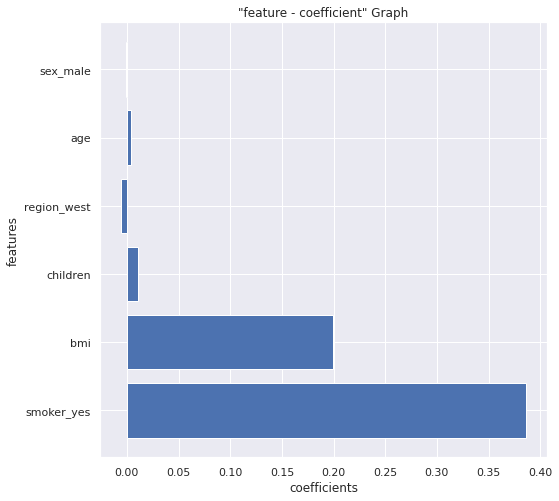

In [ ]:
### coefficients 를 시각화 합니다. 

### figure size
plt.figure(figsize = (8, 8))

### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그릴 수 있습니다. 
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

## 유의성 검정

In [ ]:
# 유의성 검정
print(result.summary())
## 3번(sex_male), 5번(region_west)은 p-value>0.05 이므로 통계적으로 유의하지 않은 변수이다.

## 설명력은 76.0%

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     490.9
Date:                Sun, 05 Jun 2022   Prob (F-statistic):          5.39e-284
Time:                        15:34:57   Log-Likelihood:                 875.16
No. Observations:                 936   AIC:                            -1736.
Df Residuals:                     929   BIC:                            -1702.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1307      0.013    -10.258

## 예측 결과

In [ ]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,0.000249,0.041212
1,0.000398,0.077221
2,0.000439,0.087256
3,0.000664,0.141565
4,0.001911,-0.039304


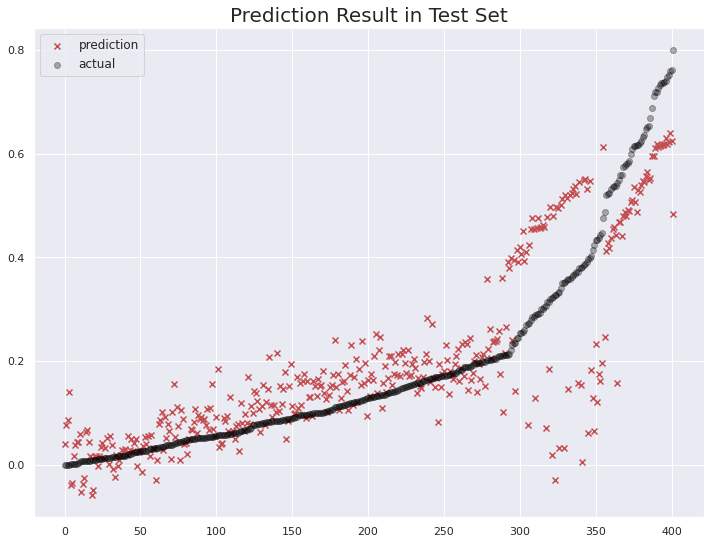

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

## 모델 성능 평가

In [ ]:
# RMSE
# test data 검증
mean_squared_error(y_pred, y_test)
## 0.0102 정도 다르다.

0.010213304621289786

In [ ]:
### 해설) Test set에서 해당 예측 모델의 R square가 0.76이고, RMSE가 0.0102입니다.

# 모델 수정2

## region - north, south 로 구분



In [ ]:
# 데이터 복사
df_scale3 = df_scale.copy()

In [ ]:
# region 변수값 변경(east)
df_scale3.replace({'region':'southeast'}, 'south', inplace=True)
df_scale3.replace({'region':'southwest'}, 'south', inplace=True)
df_scale3

,age,sex,bmi,children,smoker,region,charges
0,19,female,0.321227,0,yes,south,0.251611
1,18,male,0.479150,1,no,south,0.009636
2,28,male,0.458434,3,no,south,0.053115
3,33,male,0.181464,0,no,northwest,0.333010
4,32,male,0.347592,0,no,northwest,0.043816
...,...,...,...,...,...,...,...
1333,50,male,0.403820,3,no,northwest,0.151299
1334,18,female,0.429379,0,no,northeast,0.017305
1335,18,female,0.562012,0,no,south,0.008108
1336,21,female,0.264730,0,no,south,0.014144


In [ ]:
# region 변수값 변경(west)
df_scale3.replace({'region':'northeast'}, 'north', inplace=True)
df_scale3.replace({'region':'northwest'}, 'north', inplace=True)
df_scale3

,age,sex,bmi,children,smoker,region,charges
0,19,female,0.321227,0,yes,south,0.251611
1,18,male,0.479150,1,no,south,0.009636
2,28,male,0.458434,3,no,south,0.053115
3,33,male,0.181464,0,no,north,0.333010
4,32,male,0.347592,0,no,north,0.043816
...,...,...,...,...,...,...,...
1333,50,male,0.403820,3,no,north,0.151299
1334,18,female,0.429379,0,no,north,0.017305
1335,18,female,0.562012,0,no,south,0.008108
1336,21,female,0.264730,0,no,south,0.014144


## 더미변수화

In [ ]:
# sex, smoker, region열을 더미로 바꾸기
Y=df_scale3['charges']
X=df_scale3.drop(['charges'], axis=1) # 종속변수 drop
X=pd.get_dummies(X, columns=['sex', 'smoker', 'region']) # 더미 설정해서 데이터 간 우열이 없도록 범주화
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_north,region_south
0,19,0.321227,0,1,0,0,1,0,1
1,18,0.479150,1,0,1,1,0,0,1
2,28,0.458434,3,0,1,1,0,0,1
3,33,0.181464,0,0,1,1,0,1,0
4,32,0.347592,0,0,1,1,0,1,0


## Create the train and test datasets
: overfitting 방지 목적

In [ ]:
# 학습데이터와 테스트데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, train_size=0.7,
                                                  random_state=529)  # 다음에 똑같은 데이터를 뽑을 수 있도록 고정

In [ ]:
print(X_train.shape, X_test.shape)

(936, 9) (402, 9)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_selection= sm.add_constant(X_train.drop(['sex_female', 'smoker_no', 'region_north'], axis=1)) # drop한 더미변수(=> drop한 더미변수가 reference group이 되는 것.)

### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

# ex) japan을 drop(=> japan이 reference group이 되는 것)
## 미국 -0.1106 : japan보다 -0.1106만큼 연료의 효율성이 낮은것
## 유럽 -0.0409 : japan보다 -0.0409만큼 연료의 효율성이 낮은것

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
new_test=X_train[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_south']] 

In [ ]:
new_Xtrain=X_train[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_south']] 

In [ ]:
new_Xtest=X_test[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_south']] 

## 다중공선성(VIF)

In [ ]:
# VIF
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_selection.values, i) for i in range(X_selection.values.shape[1])]

In [ ]:
vif['features']=X_selection.columns

In [ ]:
# 변수간 영향이 높은 변수 파악하기
vif

## const : 상수

## vif 5이상 10이하는 의심 변수
## vif 10이상은 위험 변수

## 변수간 영향이 높은 변수는 없다.

,VIF Factor,features
0,15.722113,const
1,1.010672,age
2,1.053917,bmi
3,1.003964,children
4,1.008595,sex_male
5,1.010721,smoker_yes
6,1.046342,region_south


## 선형회귀분석 모델 학습(회귀모델링)

In [ ]:
# 학습
df_train = pd.concat([y_train, new_Xtrain], axis=1)
reg=smf.ols(formula='charges ~ new_Xtrain', data=df_train)
### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다. 

In [ ]:
result = reg.fit()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# 선형회귀모델링
lr=LinearRegression()
training_data=lr.fit(new_Xtrain, y_train)

In [ ]:
y_pred=lr.predict(new_Xtest)

## 모델 해석하기

In [ ]:
# 상수
lr.intercept_

-0.12976767668250638

In [ ]:
# 회귀계수
lr.coef_

array([ 0.00407881,  0.21126386,  0.01068442, -0.0012778 ,  0.38735921,
       -0.01455939])

In [ ]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)

coefs = pd.DataFrame(zip(new_Xtrain.columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,age,0.004079
1,bmi,0.211264
2,children,0.010684
3,sex_male,-0.001278
4,smoker_yes,0.387359
5,region_south,-0.014559


In [ ]:
### 크기 순서대로 나열합니다. 
### 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다. 
### 절대값 기준 함수: coefficients.abs().sort_values 

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
4,smoker_yes,0.387359
1,bmi,0.211264
5,region_south,-0.014559
2,children,0.010684
0,age,0.004079
3,sex_male,-0.001278


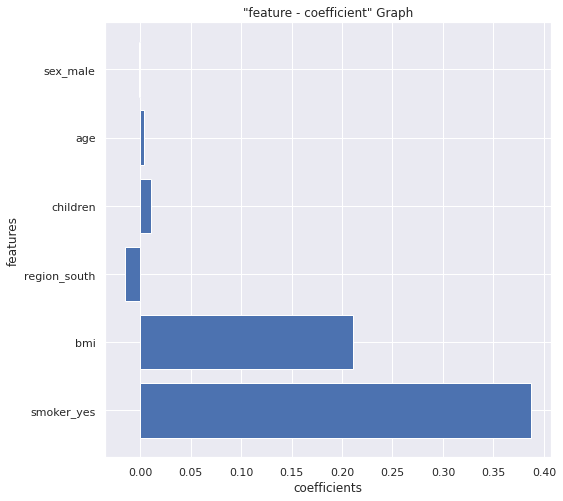

In [ ]:
### coefficients 를 시각화 합니다. 

### figure size
plt.figure(figsize = (8, 8))

### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그릴 수 있습니다. 
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

In [ ]:
# 유의성 검정
print(result.summary())
## 3번(sex_male), 5번(region_west)은 p-value>0.05 이므로 통계적으로 유의하지 않은 변수이다.

## 설명력은 76.1%

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     493.9
Date:                Sun, 05 Jun 2022   Prob (F-statistic):          6.31e-285
Time:                        15:34:59   Log-Likelihood:                 877.33
No. Observations:                 936   AIC:                            -1741.
Df Residuals:                     929   BIC:                            -1707.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1298      0.012    -10.525

In [ ]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,0.000249,0.032792
1,0.000398,0.070930
2,0.000439,0.081558
3,0.000664,0.139078
4,0.001911,-0.046282


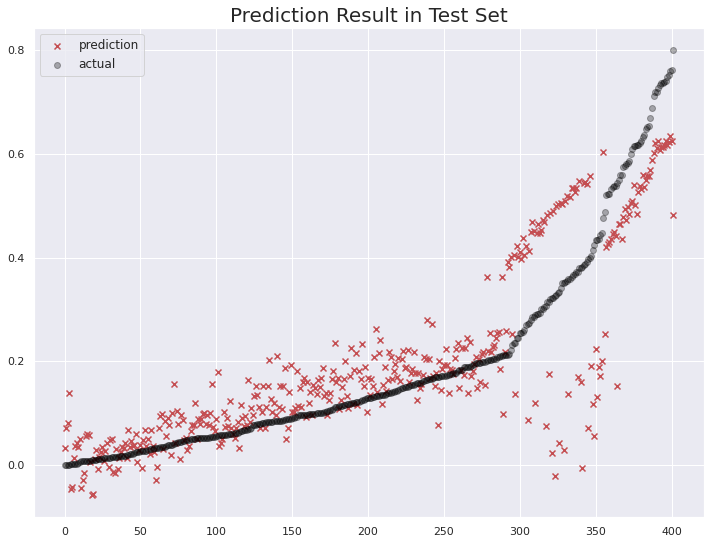

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [ ]:
# RMSE
# test data 검증
mean_squared_error(y_pred, y_test)
## 0.0101 정도 다르다.

0.010160972954776934

In [ ]:
### 해설) Test set에서 해당 예측 모델의 R square가 0.761이고, RMSE가 0.0102입니다.